<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/main/Computational%20Quantum%20Mechanics/wolff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from scipy.ndimage import convolve, generate_binary_structure

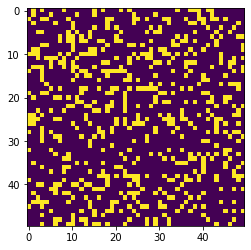

In [27]:
N = 50
init_random = np.random.random((N,N))
config = np.zeros((N,N))
config[init_random >= 0.75] = 1
config[init_random < 0.75] = -1

plt.imshow(config)


In [28]:
nbr = {(i,j):[((i+1)%N, j) , (i,(j+1)%N) , ((i-1)%N, j) , (i,(j-1)%N)] for i in range(N) for j in range(N)}

T = 2.5
p  = 1.0 - np.exp(-2.0 / T)
nsteps = 1000

import random
def wolff(config,T, nsteps=100):
  p  = 1.0 - np.exp(-2.0 / T)
  for step in range(nsteps):
      k = np.random.randint(0,N)
      l = np.random.randint(0,N)
      Pocket, Cluster = [(k,l)], [(k,l)]
      while Pocket != []:
          j = random.choice(Pocket)
          for m in nbr[j]:
              if config[m] == config[j] and m not in Cluster \
                     and np.random.uniform(0.0, 1.0) < p:
                  Pocket.append(m)
                  Cluster.append(m)
          Pocket.remove(j)
      for j in Cluster:
          config[j] *= -1
  return config

def calcMag(config):
    #Magnetization of a given configuration
    mag = np.sum(config)
    return mag

In [31]:
import copy 
T1 = np.arange(0.1,2, 0.2)
T2 = np.arange(2,2.7,0.05)
T3 = np.arange(2.8,4,0.2)
T = np.concatenate((T1,T2,T3), axis = None)
k = copy.deepcopy(config)
mag = []
for t in T:
  wolff(config, t, nsteps = 15)
  mag.append(np.abs(calcMag(config)))
  config = k

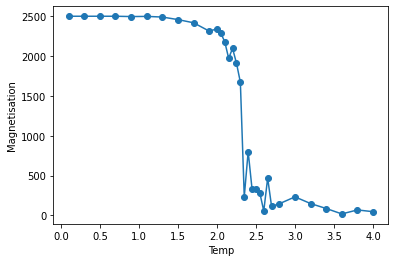

In [32]:
plt.scatter(T, mag)
plt.plot(T,mag)
plt.xlabel('Temp')
plt.ylabel('Magnetisation')
plt.savefig('stuff.png')

In [41]:
N = 50
init_random = np.random.random((N,N))
config = np.zeros((N,N))
config[init_random >= 0.75] = 1
config[init_random < 0.75] = -1

wolff(config, 2.1, nsteps = 30)

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1.,  1., -1.],
       [-1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

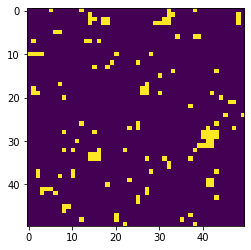

In [42]:
plt.imshow(config)